In [ ]:
# !pip install SMOTE

In [ ]:
# !pip install imbalanced-learn

In [ ]:
# !pip install -U scikit-learn imbalanced-learn

In [ ]:
# pip install tensorflow

In [4]:
# pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# pip install gensim

In [ ]:
# pip install numpy

In [ ]:
# pip install pandas

In [ ]:
# pip install matplotlib

In [ ]:
# pip install transformers

In [ ]:
# pip install nltk

In [ ]:
# import nltk

In [ ]:
# nltk.download('stopwords')

In [ ]:
# nltk.download('punkt')

In [ ]:
# nltk.download('wordnet')

In [ ]:
# pip install gensin

In [2]:
# pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# pip install pyLDAvis

In [3]:
# pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.0/169.0 kB 3.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
# import keras.preprocessing.text Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense
from keras.models import Sequential
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
import xgboost as xgb
from gensim.models import KeyedVectors
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_extraction.text import HashingVectorizer
# import spacy
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from sklearn.preprocessing import Normalizer
from gensim.models import KeyedVectors
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from gensim.models import KeyedVectors
import random
import tensorflow as tf
from nltk import ngrams
import os
import seaborn as sns
import contractions
from nltk import pos_tag
from nltk.corpus import wordnet
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.lda_model
from sklearn.decomposition import NMF
from wordcloud import WordCloud
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import TrainingArguments, Trainer
from datasets import Dataset
import torch

In [ ]:
# import nltk
# nltk.download('averaged_perceptron_tagger')

In [2]:
def reset_random_seeds(SEED=42):
   os.environ['PYTHONHASHSEED']=str(SEED)
   tf.random.set_seed(SEED)
   np.random.seed(SEED)
   random.seed(SEED)
reset_random_seeds(SEED=42)

# Data Exploration and Visualization

### Dataset Overview
We begin by importing two datasets: a training set and a test set, using Pandas' read_csv function. This step is foundational, as it prepares the data for subsequent exploration and analysis.

In [3]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

To gain a preliminary understanding of the data, train.describe() is utilized. This method provides descriptive statistics including count, mean, standard deviation, min, and max values for numeric columns in the training dataset. It's a crucial step to quickly assess data distribution and potential outliers, aiding in making informed decisions about data preprocessing and analysis strategies.

In [4]:
train.describe()

overall
count  370863.000000
mean        4.566600
std         0.930377
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000

In [5]:
train.head(20)

overall                                             Review
0         5  I love these glitter pens. They sparkle deligh...
1         5  It works well with my machine.  I use mostly c...
2         5  This is a great assortment of colors, though t...
3         5                       Just what I was looking for.
4         5      I make 400 birds for the hospital each month.
5         1                                     not very sharp
6         5                       Its just a replacement blade
7         5                                       Great value,
8         3  It is just okay for me.  The plastic is a bit ...
9         5  Always happy when I find a great priced art gi...
10        1  I only received on piece of fabric.  Wasn't I ...
11        5  My favorite color being red, one of my favorit...
12        3  Good marking pen for light colored fabric. Lin...
13        3  These fasteners work fine but the spring is a ...
14        5                      Love these for all my needles
15        5                    Basic for sewing.  Top  quality
16        4  Was a gift for someone in New Zealand at a chi...
17        5  Great products and will order again! These are...
18        2  The spools have cuts on both sides and now mat...
19        5                                   Awesome display.

In [ ]:
train.shape

In [6]:
train.isnull().sum()

overall    0
Review     8
dtype: int64

In [7]:
train.isnull().sum()

overall    0
Review     8
dtype: int64

In [8]:
train.duplicated().sum()

93449

In [9]:
train = train.drop_duplicates()

In [ ]:
train.shape

The 'Review' column in the training dataset, which contains textual data, is explicitly converted to string type to ensure consistency. This conversion was done to prevent errors during text processing and analysis that was brought up due to incorrect data types.

In [10]:
train["Review"]= train["Review"].astype(str)

### Text Length Analysis
An additional feature, text_length, is created by calculating the number of words in each review. This is achieved through applying a lambda function that splits each review by spaces and counts the resulting words. This analysis was done to gain insights regarding the following:

* Understanding Content Depth: Longer texts might provide more detailed feedback, whereas shorter texts could indicate lack of detail in reviews.
* Preprocessing Insights: Knowing the distribution of text lengths can inform decisions on text normalization steps such as truncation or padding, especially for models requiring fixed-length input.

A histogram is plotted to visualize the distribution of text lengths in the training dataset. This visualization is instrumental for several reasons:

* Data Distribution Clarity: It offers a clear visual representation of how text lengths are distributed, highlighting common lengths, outliers, and the overall spread.
* Insights into Dataset Characteristics: The distribution reveals patterns or anomalies in the data, such as a large number of very short or very long reviews, guiding further analysis and preprocessing steps.

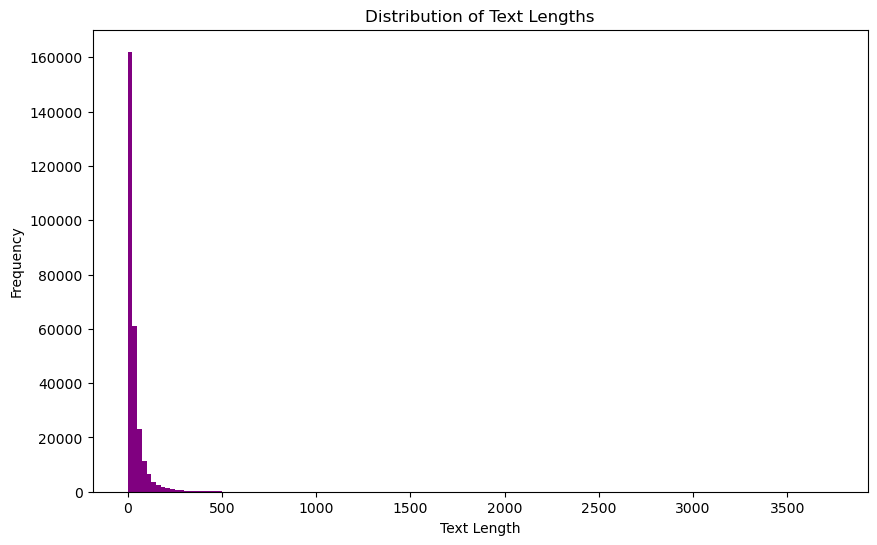

In [11]:
train['text_length'] = train['Review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
plt.hist(train['text_length'], bins=150, color='purple')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

### Word Frequency Analysis
Using the word_tokenize method from the NLTK library, we tokenize each review into words, converting them to lowercase to ensure uniformity. The frequencies of these words were then counted using Python's Counter class, identifying the 20 most common words.

#### Visualization of Word Frequencies

A bar chart was plotted to visualize these frequencies, offering immediate insight into the most prevalent words across all reviews. This visualization was crucial for several reasons:

* Common Language Patterns: It helped us identify common language usage patterns within the dataset, which were necessary for understanding the nature of the text being analyzed.
* Preprocessing Insights: Highlighting frequent words aided in recognizing stopwords or irrelevant words that would need to be filtered out in later preprocessing steps to enhance model performance.

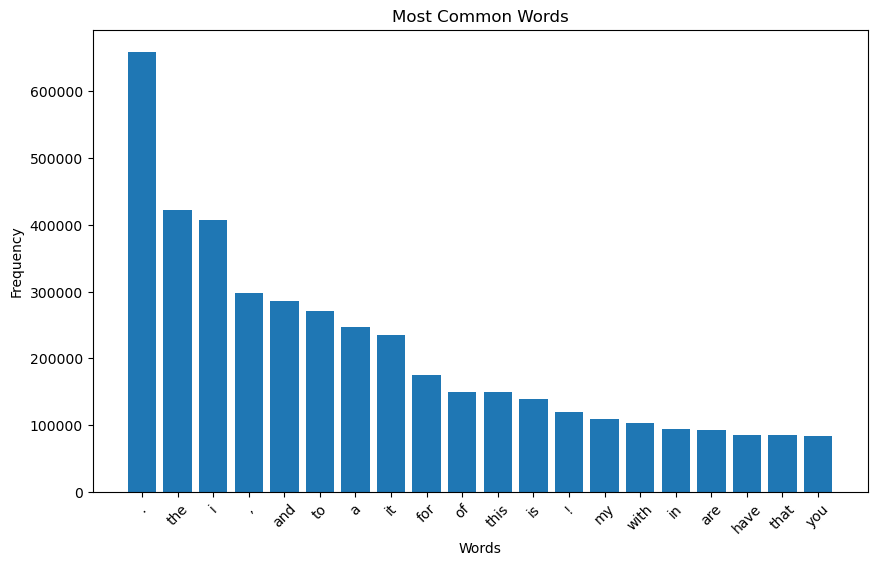

In [12]:
word_counts = [word for text in train['Review'] for word in word_tokenize(text.lower())]
word_counts = Counter(word_counts)
most_common_words = word_counts.most_common(20)
plt.figure(figsize=(10, 6))
plt.bar(*zip(*most_common_words))
plt.title('Most Common Words')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

### N-gram Analysis
#### Bigrams

Bigrams were generated for each review using a custom generate_ngrams function, which we designed to create n-gram tokens. The 20 most common bigrams were then identified and visualized in a bar chart. This:
* Revealed Contextual Relationships: Offered insights into common two-word phrases, providing context that single words cannot.
* Guided Feature Engineering: Understanding frequent bigrams can inform decisions on feature selection for models that benefit from recognizing word sequences.

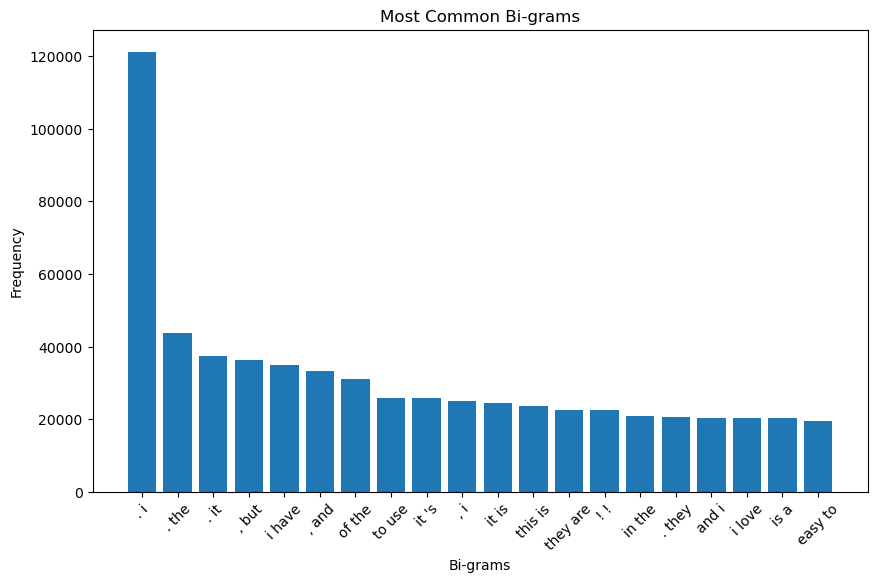

In [13]:
def generate_ngrams(text, n=2):
    words = word_tokenize(text.lower())
    ngrams_list = [' '.join(grams) for grams in ngrams(words, n)]
    return ngrams_list

bigrams = [bigram for text in train['Review'] for bigram in generate_ngrams(text, n=2)]
bigram_count = Counter(bigrams).most_common(20)

plt.figure(figsize=(10, 6))
plt.bar(*zip(*bigram_count))
plt.title('Most Common Bi-grams')
plt.xticks(rotation=45)
plt.xlabel('Bi-grams')
plt.ylabel('Frequency')
plt.show()

#### Trigrams

Following a similar methodology, trigrams (3-word sequences) were also extracted and analyzed. The visualization of the most common trigrams further enriches the understanding of the data by:

* Enhanced Contextual Insight: Illustrating how sequences of three words are commonly used together in the dataset.
* Informing Text Representation These insights can further guide the selection of text representation techniques that preserve word order,capturing more meanings.

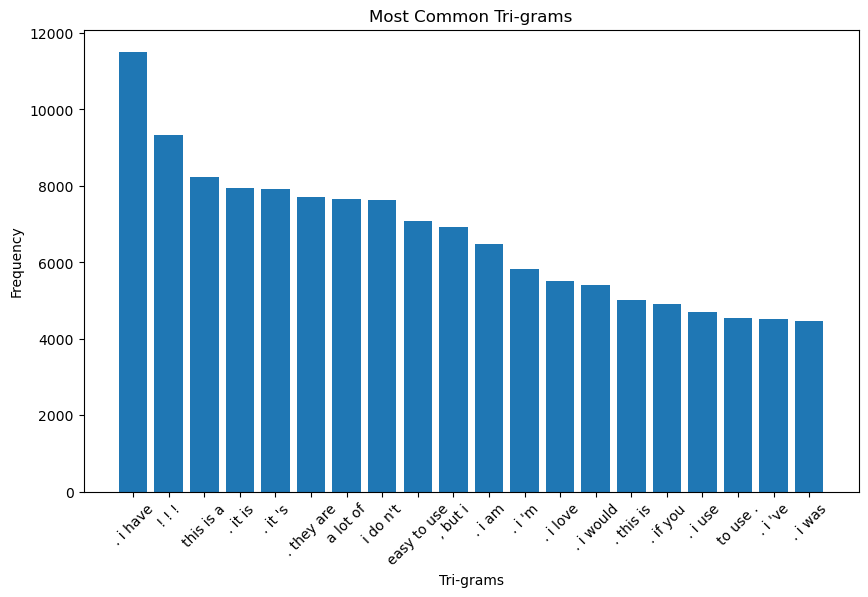

In [15]:
trigrams = [trigram for text in train['Review'] for trigram in generate_ngrams(text, n=3)]
trigram_count = Counter(trigrams).most_common(20)

plt.figure(figsize=(10, 6))
plt.bar(*zip(*trigram_count))
plt.title('Most Common Tri-grams')
plt.xticks(rotation=45)
plt.xlabel('Tri-grams')
plt.ylabel('Frequency')
plt.show()

### Class Distribution Analysis
A histogram of the 'overall' column from the training dataset was plotted to understand the distribution of class labels (ratings) across reviews. This helped us with

* Balancing Insight: It identifies if there are imbalances in class distribution that could affect model training and necessitate strategies like oversampling or class weighting.
* Strategic Modeling: Understanding class distribution can guide model selection and evaluation strategies, ensuring they are robust against potential class imbalances.

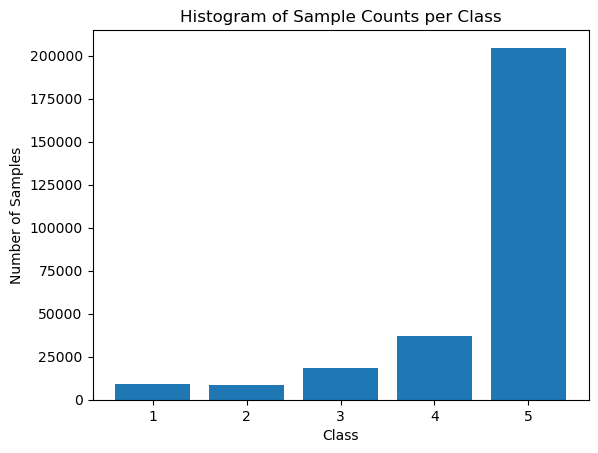

In [16]:
class_counts = train['overall'].value_counts()

plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Histogram of Sample Counts per Class')
plt.show()

In [ ]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='overall', y='Review', data=train)
# plt.title('Text Length Distribution by Label')
# plt.xlabel('Label')
# plt.ylabel('Text Length (Words)')
# plt.show()

A descriptive analysis of the test dataset was performed using .describe(), mirroring the initial steps taken with the training dataset. This ensures consistency in understanding both datasets' characteristics and prepares for effective model evaluation.

In [17]:
test.describe()

id
count  123622.000000
mean    61810.500000
std     35686.741826
min         0.000000
25%     30905.250000
50%     61810.500000
75%     92715.750000
max    123621.000000

In [18]:
test.head(20)

id                                             Review
0    0             Wonderful asst. of  wood carving tools
1    1  Pretty lace with 4 way stretch. I was exactly ...
2    2  This is a quick and easy way to start a crazy ...
3    3  This is my favorite journals, the pages are ve...
4    4  I bought this for a costume i was making. i wa...
5    5                 Great idea but they don't cut well
6    6                                  Love this thread.
7    7  GOOD REUSABLE PRODUCT.  MADE BAR LOTION WITH T...
8    8  After trial and error with various brands of a...
9    9  They are really smelly - like a vinyl shower c...
10  10                Everything you need to get started.
11  11  Gave as a gift  and bought one for myself.  Ac...
12  12                                 works as described
13  13  Great Product -- as adertised.  Just love it -...
14  14  I love these hooks. The handles feel nice when...
15  15                                        Love these.
16  16  Love just about anything to do with stamps and...
17  17  this is fantastic thread lube. I am using it w...
18  18                                             thanks
19  19  The Velcro closure comes open when you try to ...

In [19]:
test.isnull().sum()

id        0
Review    4
dtype: int64

In [20]:
test.duplicated().sum()

0

In [21]:
test.shape

(123622, 2)

# Text Preprocessing and Normalizing 

In this section to conduct different experiments we will be using the Stochastic Gradient Descent (SGD) with Binary CountVectorizer. 

Initially, the SGD classifier paired with a Binary CountVectorizer, was evaluated without any preprocessing of the text data. This baseline model serves as a point of reference for assessing the impact of subsequent text preprocessing and normalization experiments on model performance.

Later we test the model with basic cleaning of the data like:

1. Converting the text to lower cases
2. Expanding words
3. Removing special charactres
4. Tokenizing
5. Removing Stop words.

After the following clening the model is again tested and differnce in performance was noted.

Following the initial preprocessing steps, advanced text processing experiments were conducted to explore their impact on model performance. 
The following were the experiments done:

1. Stemming
2. Lemmatizing
3. Lemmatizing with POS Tagging
4. Stemming and lemmatizing together

The sequence of experiments and their outcomes are displayed below along with a thorough analysis of the experiments.


In [22]:
y = train["overall"]
X_train, X_test, y_train, y_test = train_test_split(train["Review"], y, stratify=y,test_size=0.3, random_state=42)

### Basic Text Cleaning
A series of fundamental text cleaning steps were applied to the dataset before re-evaluating the model. These steps included:

1. Lowercasing: Convert all text to lower case to ensure uniformity.
2. Expanding Words: Expand contracted words to their full forms to standardize text and reduce ambiguity.
3. Removing Special Characters: Eliminate special characters, keeping only alphanumeric characters and whitespace.
4. Tokenizing: Split text into individual words or tokens to facilitate further processing like stop word removal.
5. Removing Stop Words: Filter out common words (e.g., "the", "is", "in") that offer little value in understanding the text's context or sentiment.
Implementing these preprocessing steps aims to clean and standardize the dataset,helping improve model performance by focusing on more meaningful text elements.

In [24]:
def cleaning_text(text):
    text = text.lower()
    text = contractions.fix(text)
    
    pattern = r"[^\w\s]"
    text = [''.join([char if char.isalnum() else ' ' for char in word]) for word in text.split()]
    text = ' '.join(text)
    text =  re.sub(pattern," ",text)
    # used word_tokenize function to tokenize the text, gives list
    tokenized_text = word_tokenize(text)
    # get the stop words
    stop_words = set(stopwords.words('english'))
    # removed stop words
    tokenized_text = [word for word in tokenized_text if word not in stop_words]
    preprocessed_text = ' '.join(tokenized_text)
    return preprocessed_text
    

### Advanced Text Processing Experiments
Following basic cleaning, more sophisticated text processing techniques were explored to further understand their impact on the model. These experiments included:

1. Stemming: Reducing words to their base or root form, which can help in consolidating different forms of a word (e.g., "running" to "run").
2. Lemmatizing: Similar to stemming, but ensures that the reduced form is a valid word in the language, aiming for a balance between reducing 3. word complexity and maintaining semantic meaning.
3. Lemmatizing with POS Tagging: Applying Part-Of-Speech (POS) tagging before lemmatizing, which can improve lemmatization accuracy by understanding the context in which a word is used.
4. Combining Stemming and Lemmatizing: A dual approach to see if combining both methods offers any advantage in preprocessing.

In [25]:
def get_POS(tag):
    return {
        'J': wordnet.ADJ,
        'V': wordnet.VERB,
        'N': wordnet.NOUN,
        'R': wordnet.ADV
    }.get(tag[0], wordnet.NOUN) 

def preprocess(text,stemming = False, lemmatizing = False, POS = False):
     tokenized_text = word_tokenize(text.lower())
     if stemming: 
          # applying stemming
          stemmer = PorterStemmer()
          tokenized_text = [stemmer.stem(word) for word in tokenized_text]
     if POS:
        lemmatizer = WordNetLemmatizer()
        pos_tagged = pos_tag(tokenized_text)  # Apply POS tagging
        tokenized_text = [lemmatizer.lemmatize(word, get_POS(tag)) for word, tag in pos_tagged]

     if lemmatizing:
     # applying lemmatization
          lemmatizer = WordNetLemmatizer()
          tokenized_text = [lemmatizer.lemmatize(word) for word in tokenized_text]
     preprocessed_text = ' '.join(tokenized_text)
     return preprocessed_text

### Experimental Setup and Results
To conduct different experiments, a create_pipeline function was defined to dynamically construct a processing pipeline incorporating a vectorizer, optional normalization, feature selection, and the classifier. A custom text cleaning function and preprocessing functions were used to apply the different text normalization techniques.

The outcomes of these experiments were quantitatively assessed by training the SGD classifier with the preprocessed text and evaluating its performance. The classification reports generated for both the training and test datasets provided insights into the efficiency of the preprocessing techniques.

In [ ]:
def create_pipeline(classifiers, vectorizer, normalizer=None, reduction= False, feature_selection=True,k=1000):
     # start building the pipeline, first step -> vectorization
    step =[("vectorizer",vectorizer)]
     # if dimensionality reduction is requested add a TruncatedSVD step to the pipeline
    # if reduction:
    #     step.append(("reduction",TruncatedSVD()))
    # add normalization step
    if normalizer:
        step.append(("normalizer",normalizer))
    # if feature selection is requested add a SelectKBest step to the pipeline
    if feature_selection:
        step.append(('feature_selection', SelectKBest(chi2, k=k)))
    # add the classifier to the pipeline
    step.append(("classifier",classifiers))

        # pipeline object with the steps prepared above and assign it to the corresponding classifier name in the models dict
    models = Pipeline(step)
    return models

### Baseline Model Performance
The initial model setup involved training an SGD Classifier without any preprocessing of text data. This approach served to establish a performance benchmark for comparison against models trained on preprocessed data.

In [26]:
def SGD_Classifier(train,test):
    classifier =  SGDClassifier()
    model = create_pipeline(classifier, CountVectorizer(binary=True))
    model.fit(train,y_train)
    y_pred = model.predict(test)
    print(classification_report(y_pred,y_test))
    y_pred = model.predict(train)
    print(classification_report(y_pred,y_train))

In [27]:
SGD_Classifier(X_train,X_test)

              precision    recall  f1-score   support

           1       0.41      0.57      0.48      2009
           2       0.07      0.25      0.11       699
           3       0.13      0.43      0.20      1600
           4       0.10      0.42      0.16      2469
           5       0.99      0.79      0.88     76448

    accuracy                           0.76     83225
   macro avg       0.34      0.49      0.36     83225
weighted avg       0.92      0.76      0.83     83225

              precision    recall  f1-score   support

           1       0.42      0.62      0.50      4445
           2       0.09      0.30      0.13      1681
           3       0.14      0.49      0.22      3743
           4       0.10      0.44      0.16      5889
           5       0.99      0.79      0.88    178431

    accuracy                           0.77    194189
   macro avg       0.35      0.53      0.38    194189
weighted avg       0.92      0.77      0.83    194189



### Basic Text Cleaning
The first level of preprocessing applied basic text cleaning techniques, including:

* Converting all text to lowercase to standardize the data.
* Expanding contracted words to their full forms for consistency.
* Removing special characters to focus on meaningful text content.
* Tokenizing the text into individual words for further processing.
* Removing stopwords to reduce noise and focus on relevant words.
This preprocessing aimed to clean and standardize the text data, potentially improving model readability and focus.

In [28]:
X_train = X_train.apply(cleaning_text)
X_test = X_test.apply(cleaning_text)
SGD_Classifier(X_train,X_test)

              precision    recall  f1-score   support

           1       0.37      0.54      0.44      1933
           2       0.03      0.21      0.05       369
           3       0.11      0.45      0.17      1324
           4       0.05      0.46      0.10      1292
           5       0.99      0.78      0.87     78307

    accuracy                           0.76     83225
   macro avg       0.31      0.49      0.33     83225
weighted avg       0.94      0.76      0.83     83225

              precision    recall  f1-score   support

           1       0.39      0.58      0.47      4416
           2       0.05      0.32      0.09       953
           3       0.12      0.48      0.19      3076
           4       0.06      0.49      0.10      2982
           5       0.99      0.78      0.87    182762

    accuracy                           0.76    194189
   macro avg       0.32      0.53      0.34    194189
weighted avg       0.94      0.76      0.83    194189



### Testing with Stemming

In [29]:
X_train_stemming = X_train.apply(preprocess,stemming=True)
X_test_stemming = X_test.apply(preprocess,stemming=True)
SGD_Classifier(X_train_stemming,X_test_stemming)

              precision    recall  f1-score   support

           1       0.38      0.53      0.44      2029
           2       0.06      0.21      0.10       754
           3       0.08      0.49      0.13       865
           4       0.06      0.45      0.10      1361
           5       0.99      0.78      0.87     78216

    accuracy                           0.76     83225
   macro avg       0.31      0.49      0.33     83225
weighted avg       0.94      0.76      0.83     83225

              precision    recall  f1-score   support

           1       0.39      0.58      0.47      4477
           2       0.08      0.25      0.12      1895
           3       0.09      0.54      0.15      2075
           4       0.06      0.47      0.10      3085
           5       0.99      0.78      0.87    182657

    accuracy                           0.76    194189
   macro avg       0.32      0.52      0.34    194189
weighted avg       0.94      0.76      0.83    194189



### Testing with Lemmatizing 

In [30]:
X_train_lemmatizing = X_train.apply(preprocess,lemmatizing=True)
X_test_lemmatizing = X_test.apply(preprocess,lemmatizing=True)
SGD_Classifier(X_train_lemmatizing,X_test_lemmatizing)

              precision    recall  f1-score   support

           1       0.39      0.52      0.45      2149
           2       0.03      0.18      0.05       414
           3       0.11      0.44      0.17      1321
           4       0.06      0.46      0.11      1419
           5       0.99      0.78      0.87     77922

    accuracy                           0.76     83225
   macro avg       0.32      0.48      0.33     83225
weighted avg       0.94      0.76      0.83     83225

              precision    recall  f1-score   support

           1       0.40      0.55      0.46      4846
           2       0.05      0.26      0.08      1038
           3       0.12      0.48      0.19      3125
           4       0.06      0.48      0.11      3247
           5       0.99      0.78      0.87    181933

    accuracy                           0.76    194189
   macro avg       0.32      0.51      0.34    194189
weighted avg       0.94      0.76      0.83    194189



### Lemmatizing with POS tagging

Text data underwent preprocessing to include POS tagging, which annotates each word with its corresponding part of speech. This information was used to guide the lemmatization process, ensuring that words were reduced to their base form based on their grammatical usage.

In [31]:
X_train_pos = X_train.apply(preprocess,POS=True)
X_test_pos = X_test.apply(preprocess,POS=True)
SGD_Classifier(X_train_pos,X_test_pos)

              precision    recall  f1-score   support

           1       0.36      0.52      0.43      1944
           2       0.02      0.18      0.04       339
           3       0.10      0.44      0.17      1281
           4       0.05      0.47      0.10      1262
           5       0.99      0.78      0.87     78399

    accuracy                           0.76     83225
   macro avg       0.31      0.48      0.32     83225
weighted avg       0.94      0.76      0.83     83225

              precision    recall  f1-score   support

           1       0.38      0.56      0.45      4447
           2       0.05      0.34      0.08       790
           3       0.12      0.50      0.19      2940
           4       0.05      0.49      0.10      2881
           5       0.99      0.78      0.87    183131

    accuracy                           0.76    194189
   macro avg       0.32      0.53      0.34    194189
weighted avg       0.95      0.76      0.84    194189



### Testing using both Lemmatizing and Stemming
This experiment explored the cumulative effect of applying both stemming and lemmatizing techniques to the preprocessing pipeline, aiming to assess whether combining these methods could offer a more nuanced text normalization approach.

The precision, recall, and F1-scores across various classes were observed to fluctuate, suggesting that the combination of stemming and lemmatizing provided a mixed impact on the model's ability to classify text accurately. It is observed that just lemmatization or lemmatization with POS tagging did better in terms of these metrics compared to both stemming and lemmatizing. 

In [32]:
X_train_both = X_train.apply(preprocess,stemming = True,lemmatizing=True)
X_test_both = X_test.apply(preprocess,stemming = True,lemmatizing=True)
SGD_Classifier(X_train_both,X_test_both)

              precision    recall  f1-score   support

           1       0.39      0.52      0.44      2098
           2       0.02      0.27      0.03       157
           3       0.11      0.46      0.17      1295
           4       0.07      0.41      0.12      1888
           5       0.99      0.78      0.87     77787

    accuracy                           0.76     83225
   macro avg       0.31      0.49      0.33     83225
weighted avg       0.94      0.76      0.83     83225

              precision    recall  f1-score   support

           1       0.40      0.57      0.47      4656
           2       0.03      0.38      0.05       399
           3       0.12      0.49      0.19      3156
           4       0.07      0.42      0.12      4395
           5       0.99      0.78      0.87    181583

    accuracy                           0.76    194189
   macro avg       0.32      0.53      0.34    194189
weighted avg       0.94      0.76      0.83    194189



### Results and Observations
The documentation highlights detailed outcomes of each preprocessing experiment, including the classification report for both training and test datasets. These results provide insights into how each preprocessing technique influenced the model's ability to correctly classify text data. Key observations include:

* Basic text cleaning showed improvements in model performance, indicating the effectiveness of simple preprocessing steps in enhancing text data quality.
* Advanced preprocessing techniques like stemming and lemmatizing offered varying degrees of impact, suggesting the importance of context and dataset-specific characteristics in choosing the appropriate preprocessing strategy.
* POS Tagging can enhance the model's understanding of text context, potentially leading to slight improvements in classification accuracy.
* Combining Stemming and Lemmatizing offers a comprehensive approach to text normalization but this strategy did not lead to any peformance updates in our case.

## Logistic Regression

### Comparing NGRAM Features

In [ ]:
class_weights = {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}
classifier = LogisticRegression(max_iter=1000,penalty="l2",C=0.13,solver= "liblinear" ,class_weight=class_weights)
model = create_pipeline(classifier, TfidfVectorizer(ngram_range=(1,1)),k=15000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))

In [ ]:
class_weights = {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}
classifier = LogisticRegression(max_iter=1000,penalty="l2",C=0.13,solver= "liblinear" ,class_weight=class_weights)
model = create_pipeline(classifier, TfidfVectorizer(ngram_range=(2,2)),k=20000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))

In [ ]:
class_weights = {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}
classifier = LogisticRegression(max_iter=1000,penalty="l2",C=0.13,solver= "liblinear" ,class_weight=class_weights)
model = create_pipeline(classifier, TfidfVectorizer(ngram_range=(3,3)))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))

In [ ]:
class_weights = {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}
classifier = LogisticRegression(max_iter=1000,penalty="l2",C=0.13,solver= "liblinear" ,class_weight=class_weights)
model = create_pipeline(classifier, TfidfVectorizer(ngram_range=(1,3)),k=24500)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_pred,y_test))

## XGBoost

In [ ]:
# vectorizer = TfidfVectorizer(ngram_range=(1,3))
# X_train = vectorizer.fit_transform(X_train)
# X_test = vectorizer.transform(X_test)
# sampling_strategy = {i: 23000 for i in range(1, 4)}
# undersampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
# X_train, y_train= undersampler.fit_resample(X_train, y_train)

# y_train_adjusted = y_train-1
# y_test = y_test-1

### NGram

In [ ]:
# space = {
#     'max_depth': hp.choice('max_depth', np.arange(3, 11, dtype=int)),
#     'n_estimators': hp.choice('n_estimators', np.arange(100, 1001, 100, dtype=int)),
#     'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
#     'subsample': hp.uniform('subsample', 0.5, 1.0),
#     'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
#     'min_child_weight': hp.choice('min_child_weight', np.arange(1, 11, dtype=int)),
#     'reg_lambda': hp.uniform('reg_lambda', 1, 100),
#     'k': hp.choice('k', np.arange(8000, 17000, 500, dtype=int))
# }

# def objective(params):
#     k = params.pop('k')
#     feature_selector = SelectKBest(chi2, k=k)
#     X_train_sel = feature_selector.fit_transform(X_train, y_train)
#     X_test_sel = feature_selector.transform(X_test)
#     clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', **params)
#     score = cross_val_score(clf, X_train_sel, y_train_adjusted, scoring='accuracy', cv=5).mean()
#     print(f"\nTrial completed:")
#     print(f"Params: {params} features:{k}")
#     print(f"Accuracy: {score}, Loss: {-score}")
#     return {'loss': -score, 'status': STATUS_OK}
# # Run the optimization
# trials = Trials()
# best = fmin(fn=objective,
#             space=space,
#             algo=tpe.suggest,
#             max_evals=50,
#             trials=trials)

# print("Best hyperparameters:", best)

In [ ]:
# params = {'colsample_bytree': 0.8230008586447808,
#  'learning_rate': 0.1909617073607323,
#  'max_depth': 10,
#  'min_child_weight': 4,
#  'n_estimators': 1000,
#  'reg_lambda': 4.163618957089685,
#  'subsample': 0.59102293915828 }

# classifier =  xgb.XGBClassifier(eval_metric='mlogloss', **params)

# model = create_pipeline(classifier, TfidfVectorizer(ngram_range=(1,3)),k=10500)
# model.fit(X_train,y_train_adjusted)
# y_pred = model.predict(X_test)
# print(classification_report(y_pred,y_test))


### Googles Word2Vec

In [ ]:
# def document_vector(word2vec,doc_tokens):
#   tokens = [token for token in doc_tokens if token in word2vecmodel.key_to_index]
#   if not tokens:
#     return np.zeros(word2vec_model.vector_size)
#   doc_vector = np.mean(word2vec_model[tokens],axis=0)
#   return doc_vector

In [ ]:
# google_word2vec = KeyedVectors.load_word2vec_format("../GoogleNews-vectors-negative300.bin", binary=True)
# X_train = np.array([document_vecotr(google_word2vec,doc) for doc in X_train])
# y_train = np.array([document_vecotr(google_word2vec,doc) for doc in y_train])
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)
# print(classification_report(y_pred,y_test))


## Random Forest Classifier

In [ ]:
# classifier =  RandomForestClassifier()
# model = create_pipeline(classifier, CountVectorizer(),k=10500)
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)
# print(classification_report(y_pred,y_test))

## SGD

In [ ]:
# classifier =  SGDClassifier()
# model = create_pipeline(classifier, CountVectorizer(binary=True),k=10500)
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)
# print(classification_report(y_pred,y_test))

# Sequence Models

## Bi-Directional LSTM

## LSTM

## Transformers

The inherent limitation of BoW models is their inability to capture the order of words, crucial for understanding the semantic and syntactic nuances of language. Transitioning to sequence models, in this section, Transformers like RoBERTa (roberta-base) and Bert(bert-base), introduces the capability to consider the entire context of a sentence or document, preserving the word order and capturing deeper linguistic patterns.

We tuned both Roberta and Bert but found that bert produced better results and hence displayed the training and testing of bert here to avoid unnecessary repetition and duplication. We believe that it is highly likely the Roberta was overfitting or that our given dataset aligned more closely with Berts training rather than Roberta. 

Although we expected Roberta to do better on initial study and analysis, after the final training was done Bert outperformed Roberta. It was ensured that the hyperparameters when training both the models were kept consistent. Different hyperparameters were also experimented on but due to resource constraints we couldn't explore and experiment as much as we wanted to. After extensive research we have come to a conclusion that the hyperparameters selected for our experiments could have likely favoured Bert more than Roberta.

### Model Training

The training was done utilizing Nvidia GPUs on DMOG. In the code we set device to CUDA because of this.

In [6]:
# Load pre-trained model and tokenizer
new_model = "bert_trained"
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=5)

# Check for CUDA availability and set device
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"CUDA is available. Current device: {torch.cuda.current_device()} - {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("CUDA is not available, using CPU instead.")

# Move model to the chosen device
model.to(device)

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


CUDA is not available, using CPU instead.


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

The dataset underwent basic preprocessing to convert reviews into a suitable format for the Transformer model. This involved:
* Ensuring all text data was in string format.
* Handling missing values to maintain data integrity.
* Adjusting the overall rating to align with a zero-indexed labeling system, essential for classification tasks.

In [7]:
# Load and prepare dataset
df = pd.read_csv("train.csv")
df['Review'] = df['Review'].astype(str)
df.dropna(subset=['Review', 'overall'], inplace=True)
df['overall'] = df['overall'].astype(int) - 1  

# Split the dataset into training and testing
train_df, test_df = train_test_split(df, test_size=0.3, stratify=df['overall'], random_state=42)
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

In [8]:
# Define the tokenize function
def tokenize_function(examples):
    tokenized_inputs = tokenizer(examples['Review'], truncation=True, padding="max_length", max_length=512, return_tensors="pt")
    tokenized_inputs['labels'] = examples['overall']
    return tokenized_inputs

# Tokenize the datasets
tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)

tokenized_train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
tokenized_test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

Map:   0%|          | 0/259604 [00:00<?, ? examples/s]

Map:   0%|          | 0/111259 [00:00<?, ? examples/s]

* A custom training setup was defined using the TrainingArguments class, specifying parameters like the number of epochs, batch size, warmup steps, and logging configuration, tailored to optimize model performance over the training process.
* The Trainer class facilitated the training of the roberta-base/bert-base model on the tokenized dataset, with evaluations conducted against a split test dataset to monitor progress and performance.

In [9]:
# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    load_best_model_at_end=True,
    evaluation_strategy="epoch",
    save_strategy="epoch"
)

In [10]:
# Initialize and train the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_test_dataset,
    tokenizer=tokenizer,
)

In [ ]:
# Train the model
# trainer.train()

In [ ]:
results = trainer.evaluate()

### Model Testing

#### Preparing the Data

The review texts are preprocessed using the RoBERTa/Bert tokenizer depending on the model we load, which includes padding, truncation, and conversion to PyTorch tensors. This step is crucial for standardizing the input data format and length, ensuring consistency across all inputs fed into the model.

In [15]:
# load the fine-tuned model and tokenizer
model_name = "bert"
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=5)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [16]:
# Load the review data
input_file = "test.csv"  # Update this to the path of your input CSV file
df = pd.read_csv(input_file)
df['Review'] = df['Review'].astype(str)

* Classification Process: Each review is individually tokenized, converted to the appropriate device - this was done as it was initially tested on dmog to run faster. The tokenized review is then passed through the model. The model's output logits are interpreted to obtain the most likely class for each review.
* Prediction Adjustment: The predictions are adjusted by adding 1, as while training the labels were made to start from 0. This adjustment aligns the predictions with a 1-5 rating scale, making it more interpretable and ready for analysis.

In [18]:
# Prepare the reviews for the model
def prepare_data(reviews):
    tokenized = tokenizer(reviews, padding=True, truncation=True, max_length=512, return_tensors="pt")
    return tokenized

# Classify reviews and add predictions to the DataFrame
def classify_reviews(df):
    predictions = []
    for review in df['Review']:
        inputs = prepare_data(review).to(device)
        with torch.no_grad():
            outputs = model(**inputs)
            preds = torch.argmax(outputs.logits, dim=1)
            predictions.append(preds.item() + 1)
    df['overall'] = predictions
    return df

In [ ]:
# Apply the classification
df = classify_reviews(df)

Here we add the model's predictions back into the DataFrame and exporting the results to a CSV file. This output file, "prediction17.csv", contains the ids and predicted ratings for each review which was then submitted to the kaggle competition.

In [ ]:
# Save the DataFrame with predictions to a new CSV file
# output_file = "predictions/prediction17.csv"
# df[['id', 'overall']].to_csv(output_file, index=False)

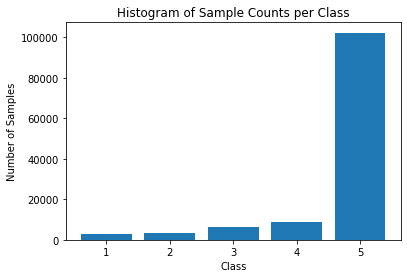

In [13]:
output_file = "predictions/prediction17.csv"
df = pd.read_csv(output_file)

class_counts = df['overall'].value_counts()

plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Histogram of Sample Counts per Class')
plt.show()

# Topic Modelling Using LDA

In [33]:
high_rated = train[train['overall'] == 5]
low_rated = train[train['overall'] == 1]

In [34]:
five = high_rated['Review'].apply(cleaning_text)
one = low_rated['Review'].apply(cleaning_text)

five_star = five.apply(preprocess, POS=True)
one_star = one.apply(preprocess,POS=True)


In [35]:
tfid_vectorizer_high = TfidfVectorizer(ngram_range = (1,1),max_features= 10000)
tfid_vectorizer_low = TfidfVectorizer(ngram_range = (1,1),max_features= 10000)
high = tfid_vectorizer_high.fit_transform(five_star)
low = tfid_vectorizer_low.fit_transform(one_star)

In [36]:
# selector = SelectKBest(chi2, k=N)
n_topics = 10
lda_high = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda_high.fit(high)

lda_low = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda_low.fit(low)


LatentDirichletAllocation(random_state=0)

In [ ]:
high.shape

Topic 1 - great, good , quality, price, value, easy use
Topic 5 - good work, fast delivery, 

In [37]:
panel_high = pyLDAvis.lda_model.prepare(lda_high, high, tfid_vectorizer_high, mds='tsne')
pyLDAvis.display(panel_high)

Smallest bubble the most reveleant words are negative for higher review topic modelling

In [38]:
panel_low = pyLDAvis.lda_model.prepare(lda_low, low, tfid_vectorizer_low, mds='tsne')
pyLDAvis.display(panel_low)

In [39]:
def plot_word_clouds(lda_model, vectorizer, n_words=20):
    words = vectorizer.get_feature_names_out()
    components = lda_model.components_
    
    for topic_idx, topic in enumerate(components):
        word_weights = {words[i]: topic[i] for i in topic.argsort()[:-n_words - 1:-1]}
        wordcloud = WordCloud(width=800, height=600, background_color='white').generate_from_frequencies(word_weights)
        
        plt.figure(figsize=(10, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f'Topic {topic_idx + 1}')
        plt.show()

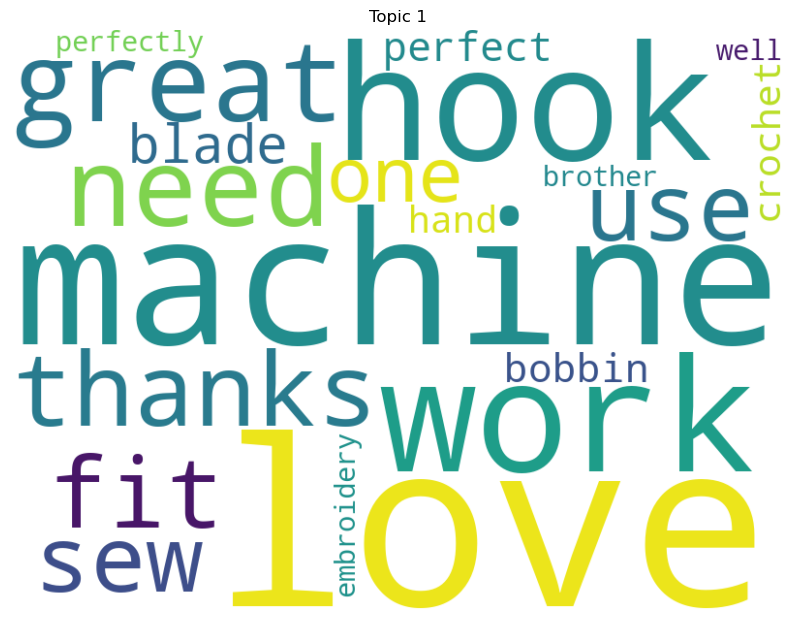

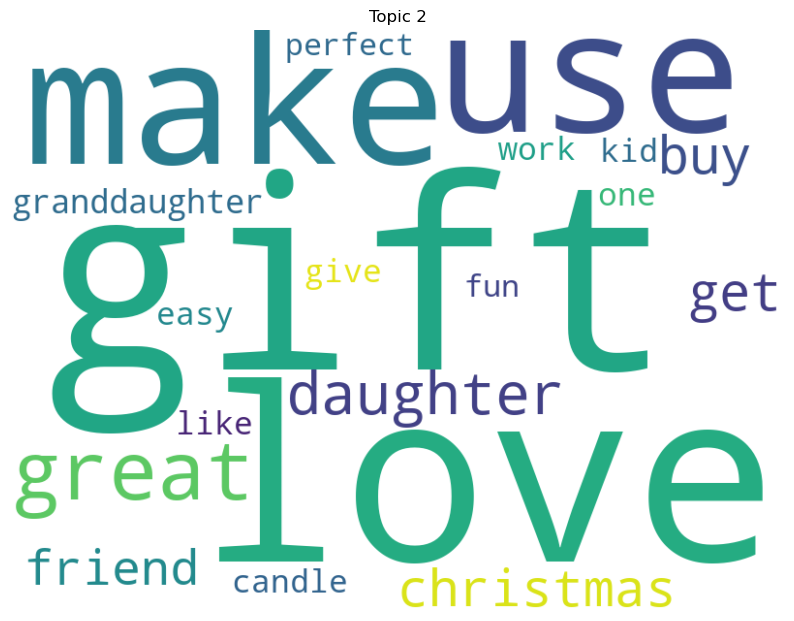

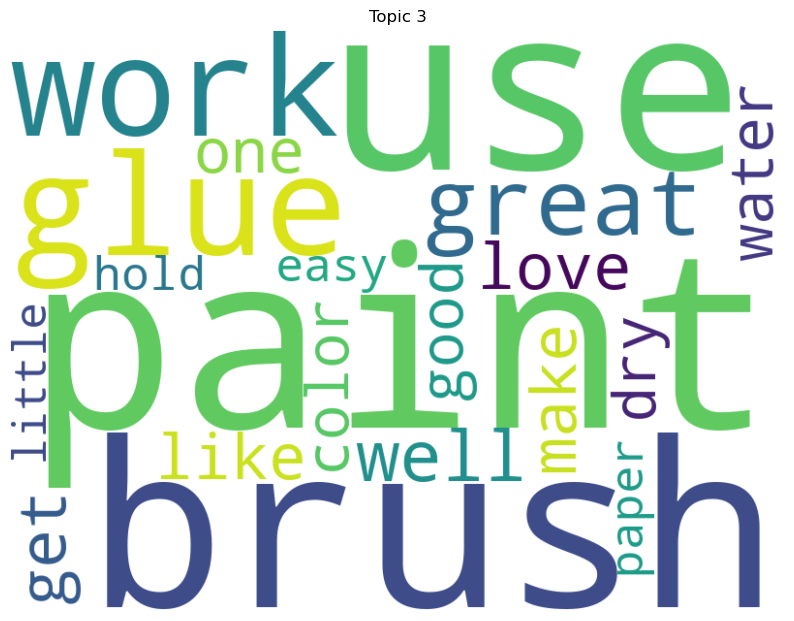

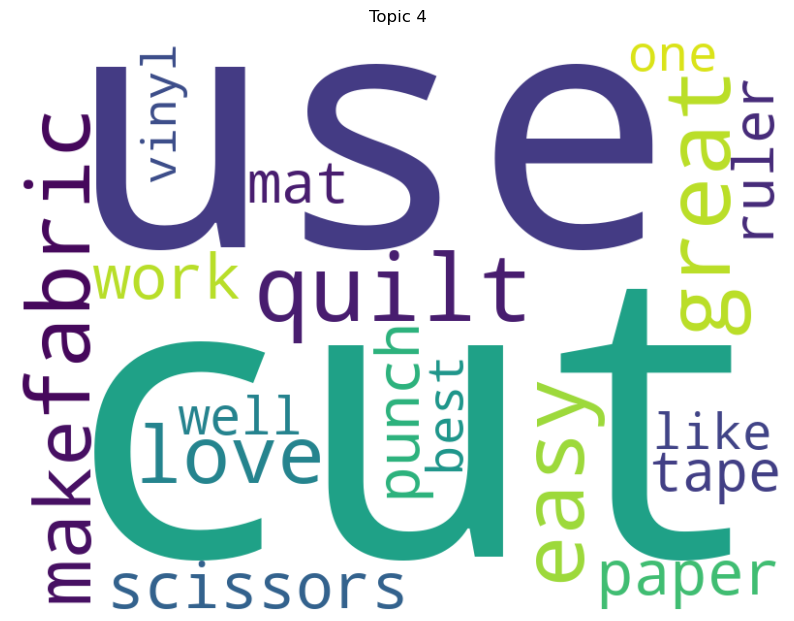

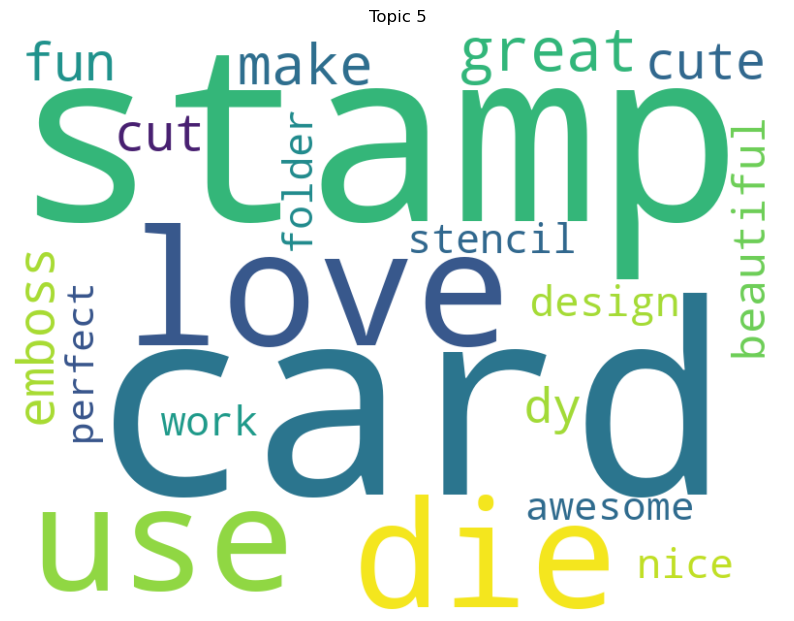

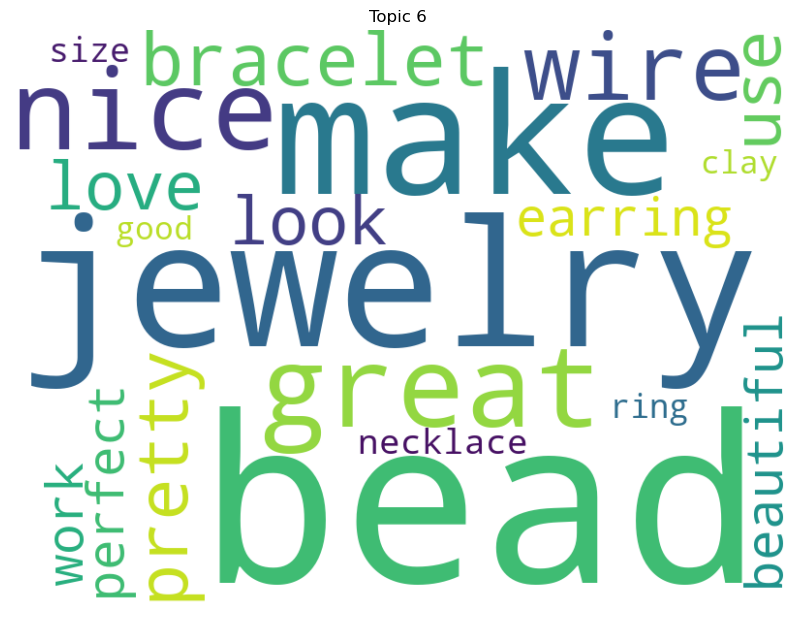

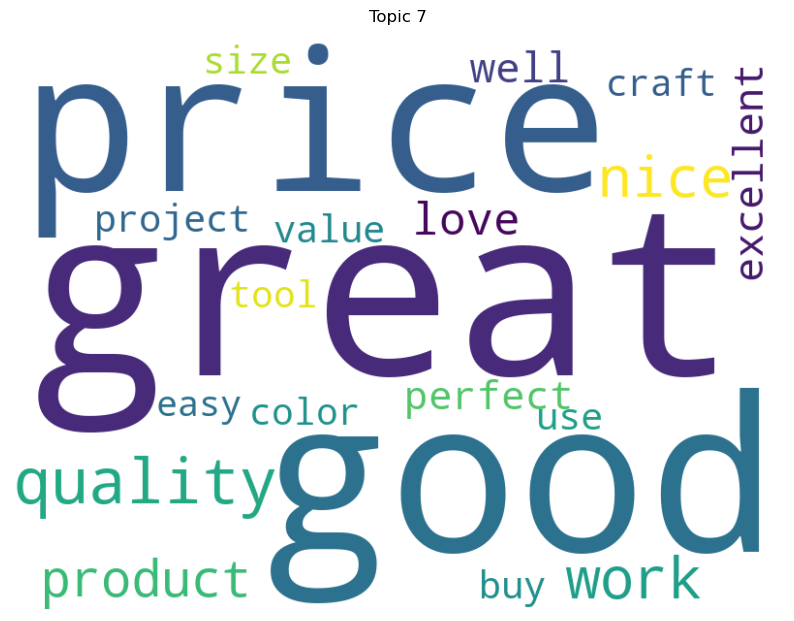

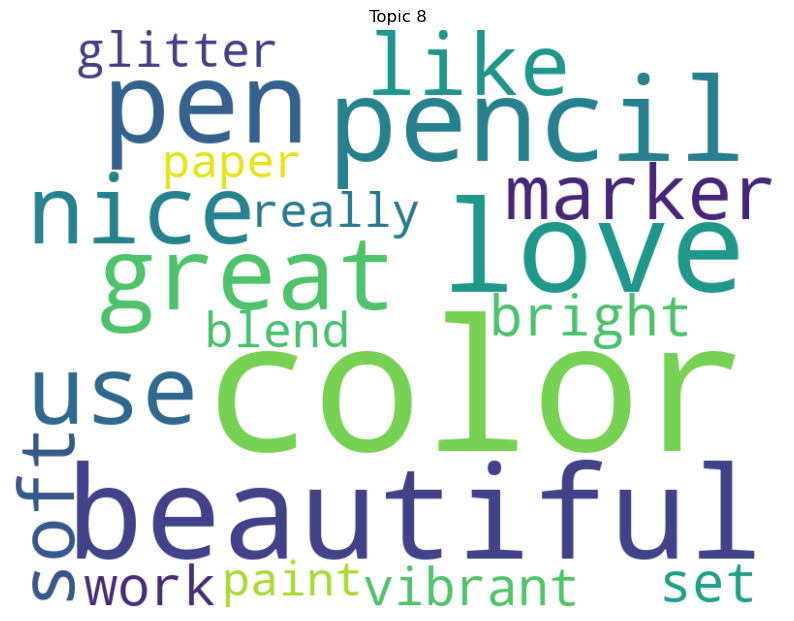

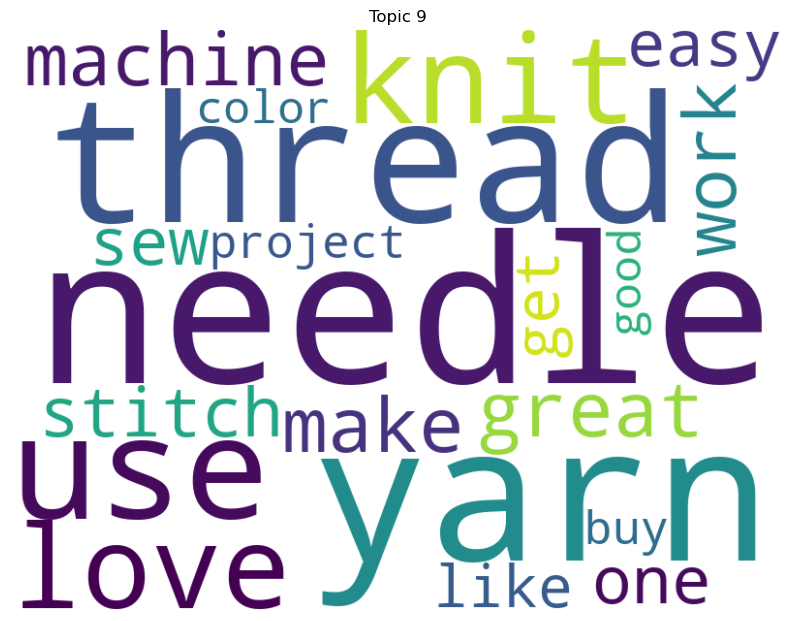

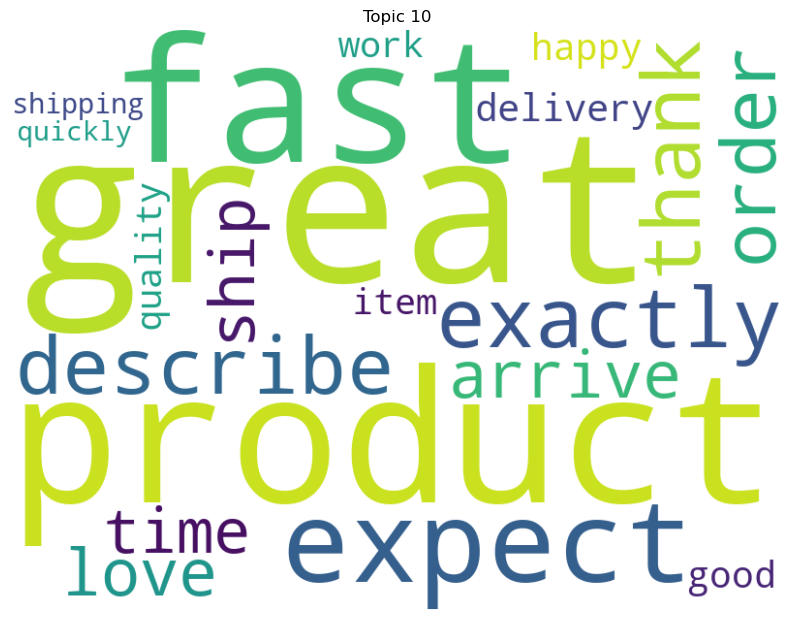

In [40]:
plot_word_clouds(lda_high, tfid_vectorizer_high, n_words=20)

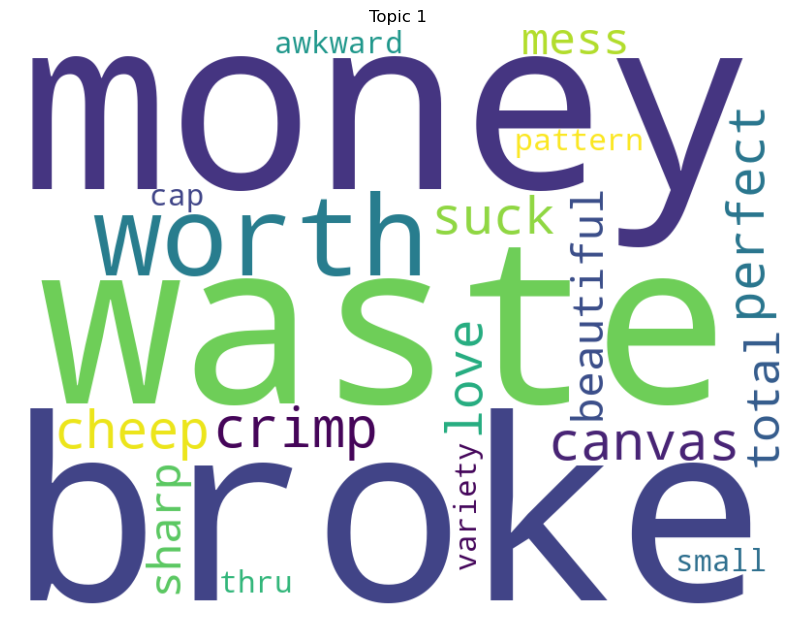

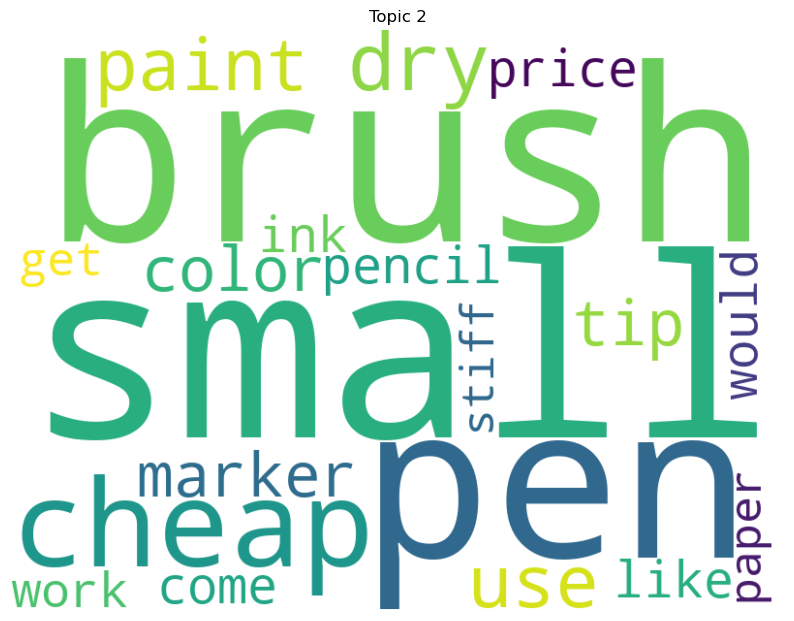

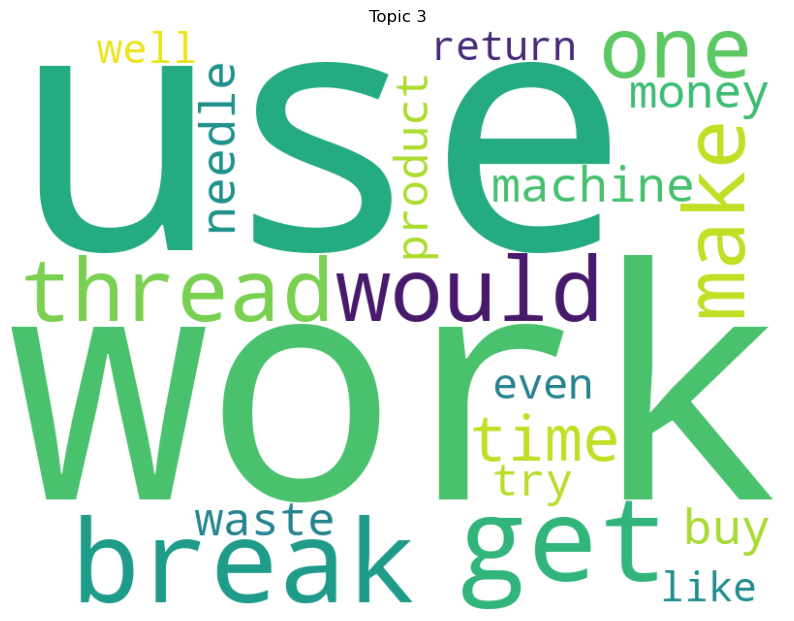

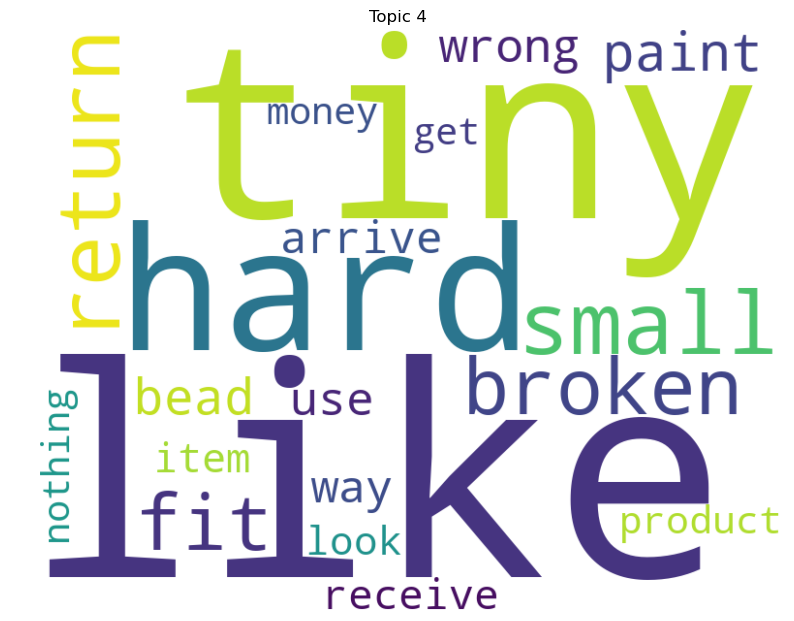

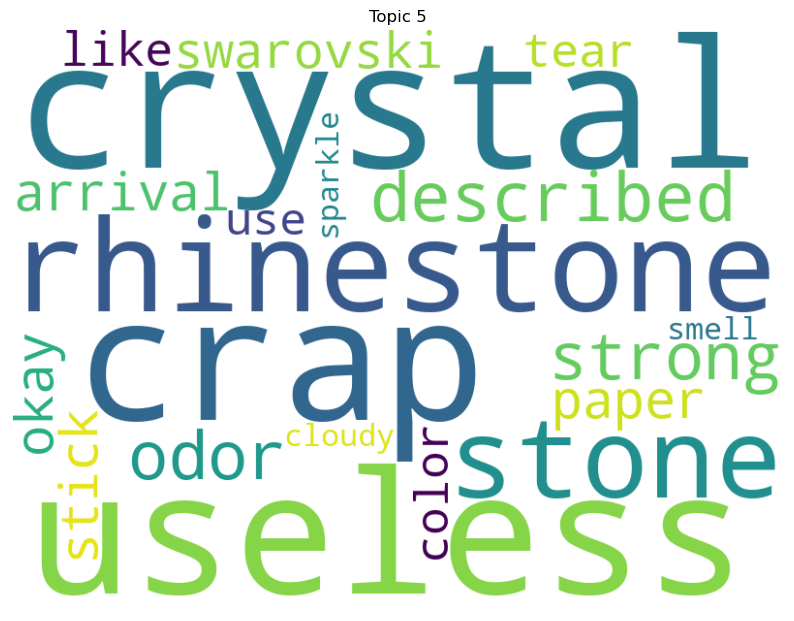

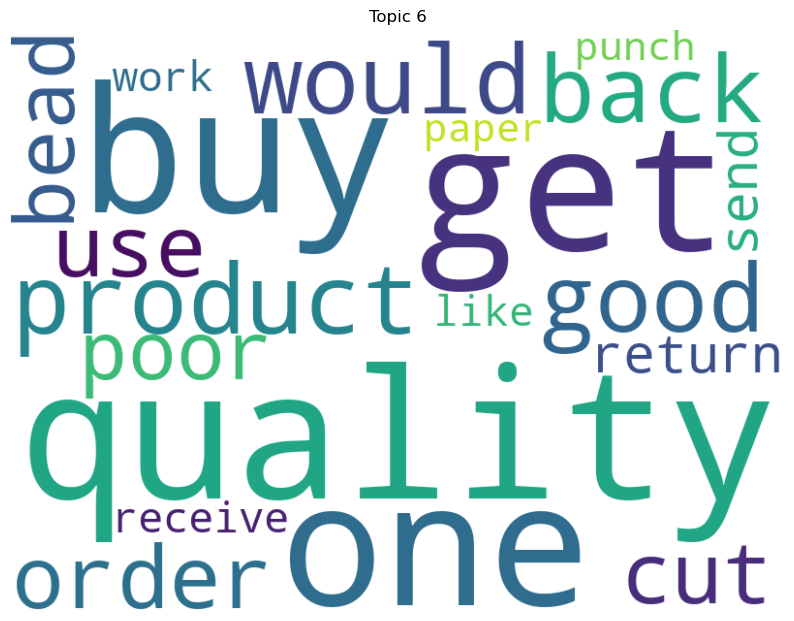

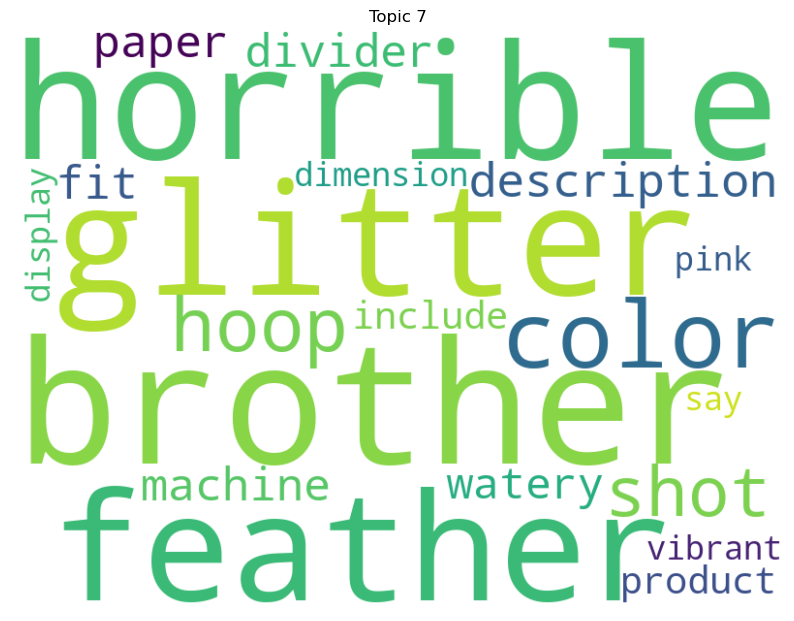

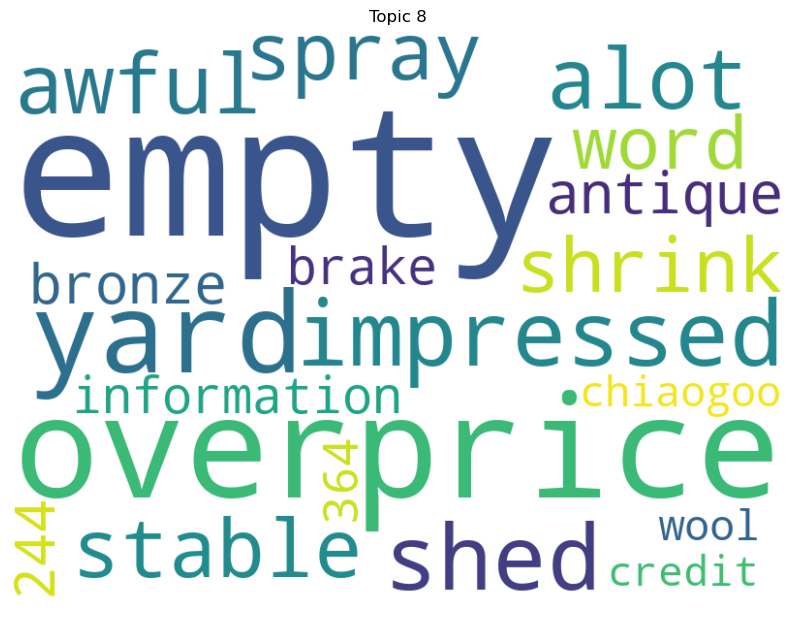

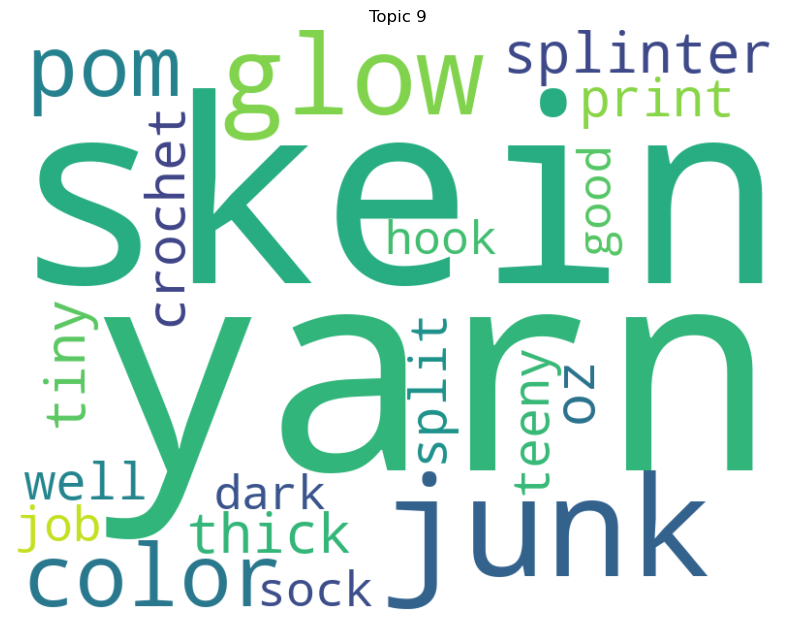

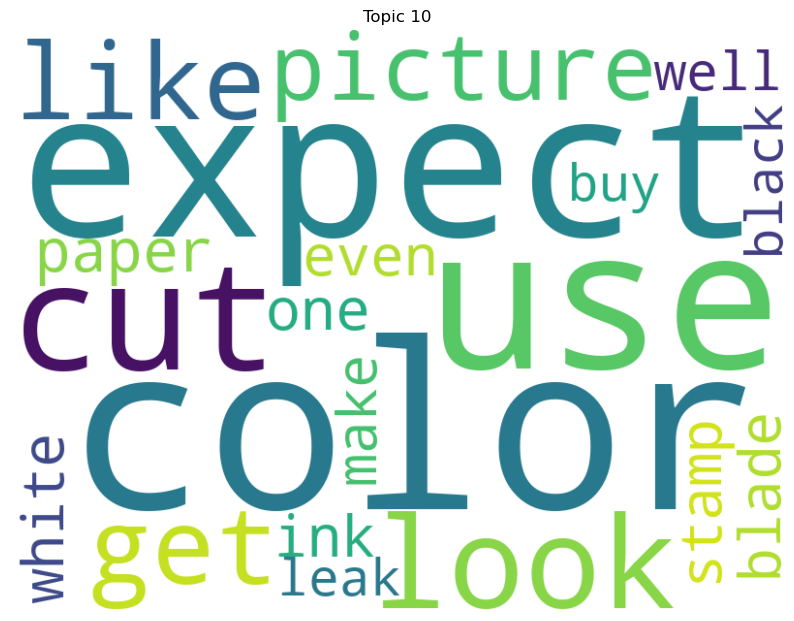

In [41]:
plot_word_clouds(lda_low, tfid_vectorizer_low, n_words=20)

## Topic Modelling Using NMF

In [42]:
tfidf_vectorizer_high_nmf = TfidfVectorizer(max_df=0.95, min_df=2)
tfidf_vectorizer_low_nmf = TfidfVectorizer(max_df=0.95, min_df=2)
high = tfidf_vectorizer_high_nmf.fit_transform(five_star)
low = tfidf_vectorizer_low_nmf.fit_transform(one_star)

In [43]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [44]:
nmf_model = NMF(n_components=10, random_state=42)
nmf_high = nmf_model.fit_transform(high)
nmf_components_high = nmf_model.components_
no_top_words = 30
display_topics(nmf_model, tfidf_vectorizer_high_nmf.get_feature_names_out(), no_top_words)

Topic 0:
make like one buy get would cut machine really needle need set sew well much little purchase go small come look thread size recommend time want order paper find best
Topic 1:
love stamp daughter yarn gift absolutely die thank stuff order card wife cute granddaughter hook thanks dy design pen much paper awesome set size bead friend folder marker emboss quality
Topic 2:
great price quality value item craft tool deal buy look thanks fast work project service stamp set card shipping jewelry making size addition stuff variety ship thank paint little brush
Topic 3:
good quality price value high expect deal buy excellent size paint brush paper variety always thread fast delivery seem item look purchase reasonable far selection arrive ship stuff brand condition
Topic 4:
nice quality really set bead size look price assortment thank stamp variety brush selection sharp pretty yarn sturdy soft weight paper case smooth expect thanks addition heavy jewelry card design
Topic 5:
work well per

In [45]:
nmf_model = NMF(n_components=10, random_state=42)
nmf_low = nmf_model.fit_transform(low)
nmf_components_low = nmf_model.components_
no_top_words = 30
display_topics(nmf_model, tfidf_vectorizer_low_nmf.get_feature_names_out(), no_top_words)

Topic 0:
cut get would one product paper buy return make blade back even fabric go order could good try purchase well punch send item never think give want piece review pay
Topic 1:
work well return hard try could never get great pen machine glue disappoint properly stiff expect maybe advertise dry way right crap mess describe really fine cricut correctly old ring
Topic 2:
money waste worth time total save buy even complete stick flimsy thing product useless junk terrible stay spend garbage give cheaply make nothing horrible bad sorry wast wish trash big
Topic 3:
like bead look picture receive nothing expect show order plastic tiny disappointed photo white dull really size disappoint think know feel nice bag glass pretty item see get description one
Topic 4:
thread machine needle sew bobbin fit brother singer spool break stitch embroidery say foot eye buy tension would wind start sewing go repair new threader purchase keep back get one
Topic 5:
small expect size way fit really much tin